In [1]:
import sys
sys.path.append('../gummistiefel')

In [2]:
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None


In [14]:
df = pd.read_pickle("/Users/admin/Documents/HU/VisualAnalytics/Visual-Analytics/dash_v1/event_filtered.pickle")
df.reset_index(inplace=True, drop=True)
area = df.event_area
event_id = df.event_id

,Unnamed: 0,event_id,event_start,event_area,event_length,event_si,date,area,lat,latMax,lon,lonMax,maxPrec,meanPre,si,size,stdv,country,event_year,event_month
0,34,199900024,1999-01-01 06:00:00,0.97,9,0.02,1999-01-01 06:00:00,0.03,37.490002,37.540001,10.84,10.83,9.130000,8.30,0.0,2,0.82,INT,1999,1
1,35,199900024,1999-01-01 06:00:00,0.97,9,0.02,1999-01-01 07:00:00,0.06,37.590000,37.669998,11.00,11.09,10.680000,8.83,0.0,4,1.21,INT,1999,1
2,36,199900024,1999-01-01 06:00:00,0.97,9,0.02,1999-01-01 08:00:00,0.20,37.950001,37.790001,11.40,11.21,9.840000,7.97,0.0,14,0.76,INT,1999,1
3,37,199900024,1999-01-01 06:00:00,0.97,9,0.02,1999-01-01 09:00:00,0.31,38.299999,38.169998,11.65,11.85,11.950000,8.76,0.0,21,1.34,INT,1999,1
4,38,199900024,1999-01-01 06:00:00,0.97,9,0.02,1999-01-01 10:00:00,0.23,38.630001,38.400002,11.87,11.97,11.810000,8.57,0.0,16,1.42,INT,1999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39033,422897,198603444,1986-06-17 09:00:00,0.37,6,0.02,1986-06-17 10:00:00,0.21,40.060001,39.980000,9.45,9.52,17.940001,10.47,0.0,14,4.12,IT,1986,6
39034,422898,198603444,1986-06-17 09:00:00,0.37,6,0.02,1986-06-17 11:00:00,0.12,39.740002,39.750000,9.43,9.42,16.270000,11.66,0.0,8,3.39,IT,1986,6
39035,422899,198603444,1986-06-17 09:00:00,0.37,6,0.02,1986-06-17 12:00:00,0.09,39.660000,39.639999,9.43,9.43,20.530001,11.45,0.0,6,5.81,IT,1986,6
39036,422900,198603444,1986-06-17 09:00:00,0.37,6,0.02,1986-06-17 13:00:00,0.15,39.509998,39.639999,9.39,9.43,16.680000,9.41,0.0,10,4.04,IT,1986,6


In [11]:
list(df)

['Unnamed: 0',
 'event_id',
 'event_start',
 'event_area',
 'event_length',
 'event_si',
 'date',
 'area',
 'lat',
 'latMax',
 'lon',
 'lonMax',
 'maxPrec',
 'meanPre',
 'si',
 'size',
 'stdv',
 'country',
 'event_year',
 'event_month']

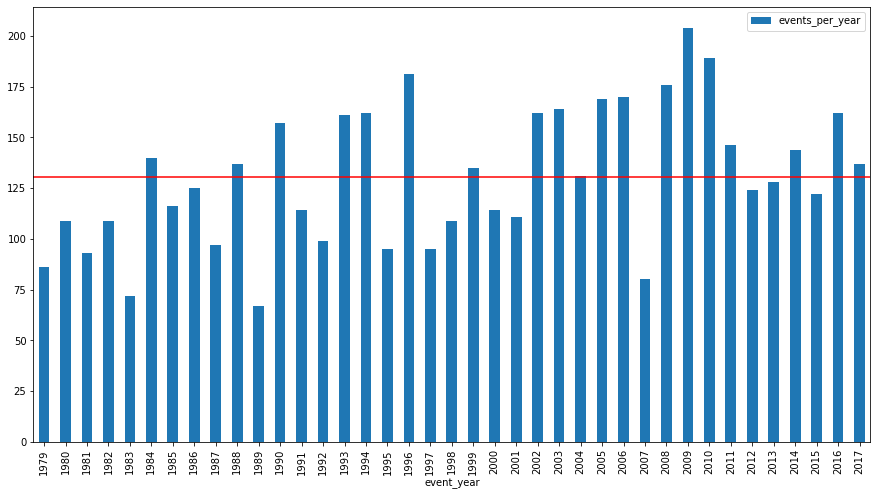

In [10]:
# events per year
events_per_year = df.groupby('event_year')['event_id'].nunique().reset_index()
events_per_year = events_per_year.rename(columns={"event_id": "events_per_year"})
events_mean = events_per_year.events_per_year.mean()

ax = events_per_year.plot(kind="bar", x="event_year", y="events_per_year", figsize=(15,8))
ax.axhline(events_mean, color="red", linestyle="-", )

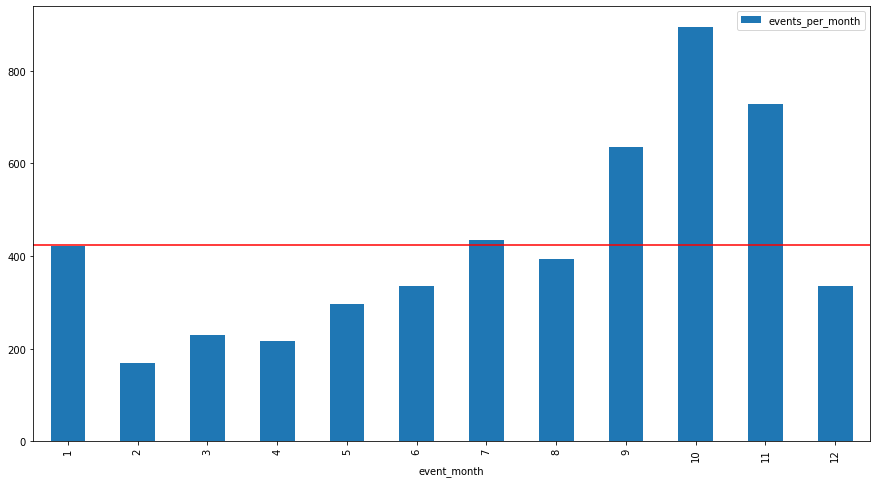

In [13]:
# events per month
events_per_month = df.groupby('event_month')['event_id'].nunique().reset_index()
events_per_month = events_per_month.rename(columns={"event_id": "events_per_month"})
events_mean = events_per_month.events_per_month.mean()

ax = events_per_month.plot(kind="bar", x="event_month", y="events_per_month", figsize=(15,8))
ax.axhline(events_mean, color="red", linestyle="-", )

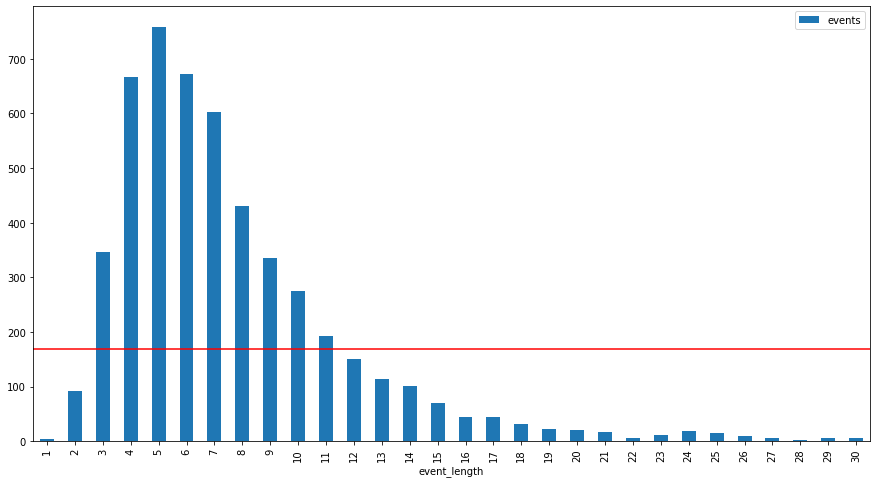

In [30]:
# events per duration
events_by_duration = df.groupby('event_length')['event_id'].nunique().reset_index()
events_by_duration = events_by_duration.rename(columns={"event_id": "events"})
events_by_duration = events_by_duration[events_by_duration.event_length.between(1,30)]
events_mean = events_by_duration.events.mean()

ax = events_by_duration.plot(kind="bar", x="event_length", y="events", figsize=(15,8))
ax.axhline(events_mean, color="red", linestyle="-", )

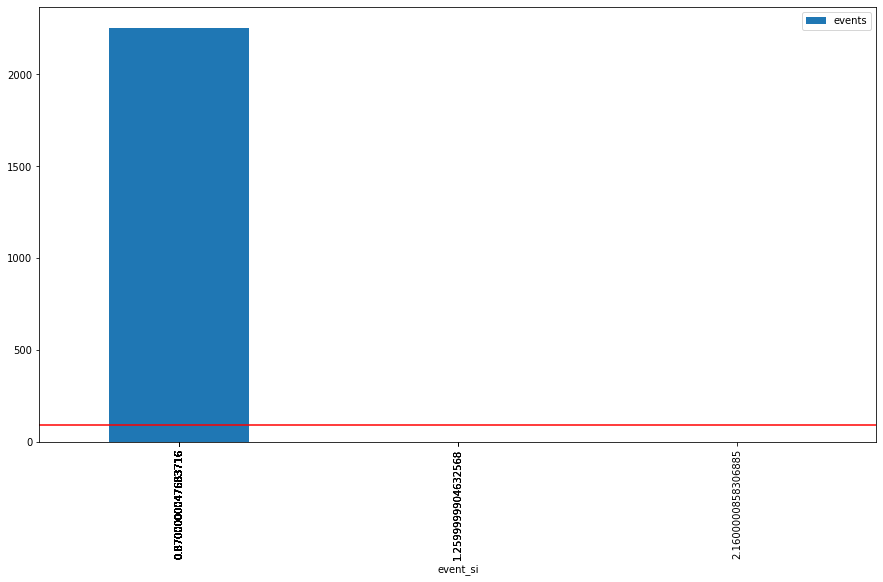

In [27]:
# events per severity
events_by_severity = df.groupby('event_si')['event_id'].nunique().reset_index()
events_by_severity = events_by_severity.rename(columns={"event_id": "events"})
events_by_severity = events_by_severity[events_by_severity.event_length.between(0,1)]
events_mean = events_by_severity.events.mean()

ax = events_by_severity.plot(kind="bar", x="event_si", y="events", figsize=(15,8))
ax.axhline(events_mean, color="red", linestyle="-", )
